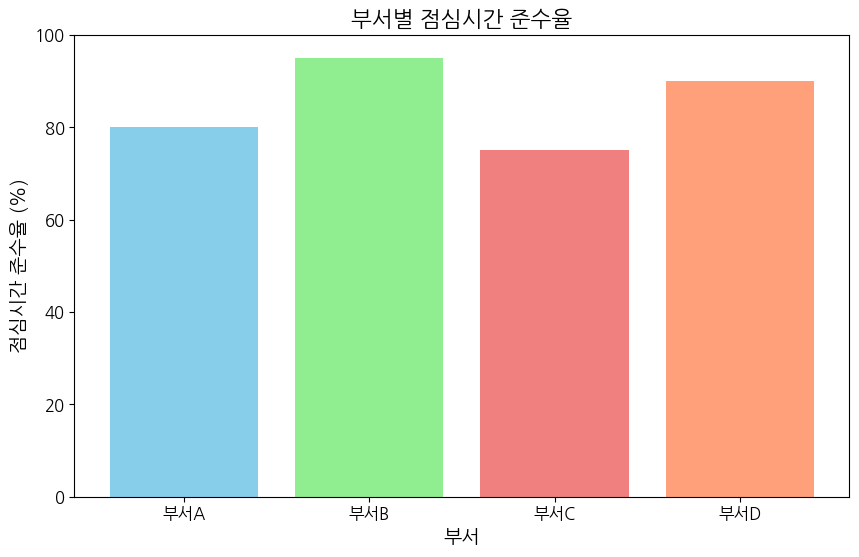

In [5]:
import matplotlib.pyplot as plt
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['font.size'] = 12
plt.rc('font', family = 'NanumGothic')

# 예시 데이터: 부서별 점심시간 준수율
departments = ['부서A', '부서B', '부서C', '부서D']
compliance_rates = [80, 95, 75, 90]  # 점심시간 준수율 (0-100%)

# 한글 폰트 설정
# font_path = "‪C:/Windows/Fonts/NanumGothic_2.ttf"  # 사용할 한글 폰트 경로
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(departments, compliance_rates, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('부서별 점심시간 준수율', fontsize=16)
plt.xlabel('부서', fontsize=14)
plt.ylabel('점심시간 준수율 (%)', fontsize=14)
plt.ylim(0, 100)  # y축 범위 설정
plt.show()


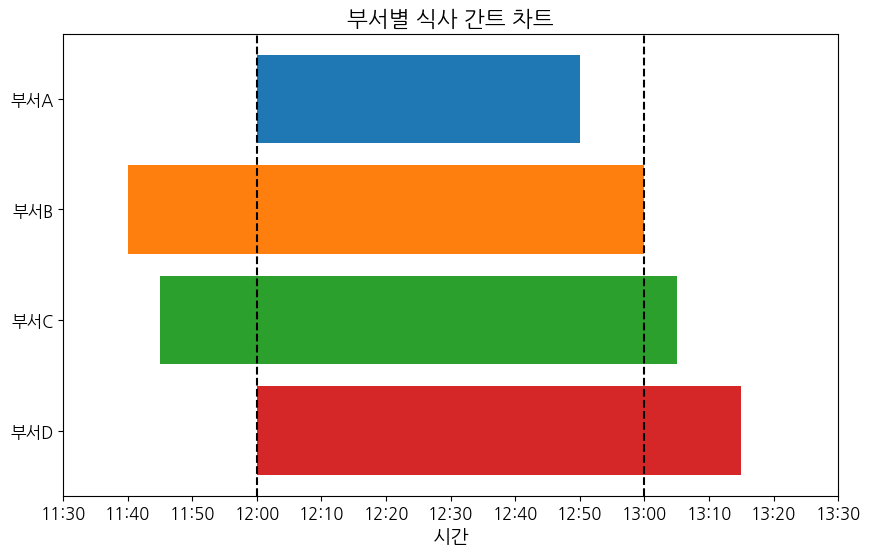

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 예시 데이터: 부서, 식사 시작 시간, 식사 종료 시간
data = {
    '부서': ['부서A', '부서B', '부서C', '부서D'],
    '식사_시작_시간': ['12:00', '11:40', '11:45', '12:00'],
    '식사_종료_시간': ['12:50', '13:00', '13:05', '13:15']
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 문자열을 datetime 형식으로 변환
df['식사_시작_시간'] = pd.to_datetime(df['식사_시작_시간'], format='%H:%M')
df['식사_종료_시간'] = pd.to_datetime(df['식사_종료_시간'], format='%H:%M')

# 간트 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 각 부서에 대한 가로 막대 그래프 생성
for i in range(len(df)):
    ax.barh(df['부서'][i], width=df['식사_종료_시간'][i] - df['식사_시작_시간'][i], left=df['식사_시작_시간'][i])

# X 축 레이블 및 형식 설정
ax.set_xlabel('시간', fontsize=14)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))  # 15분 간격으로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim([datetime.strptime('11:30', '%H:%M'), datetime.strptime('13:30', '%H:%M')])

# Y 축에 12:00과 13:00의 점심시간 기준선을 추가
ax.axvline(x=datetime.strptime('12:00', '%H:%M'), color='black', linestyle='--', label='점심시간 (12:00)')
ax.axvline(x=datetime.strptime('13:00', '%H:%M'), color='black', linestyle='--', label='점심시간 (13:00)')

# 그래프 스타일 및 타이틀 설정
ax.invert_yaxis()  # Y 축 순서를 역순으로 변경 (부서명이 위에서부터 아래로 표시되도록)
plt.title('부서별 식사 간트 차트', fontsize=16)
plt.show()


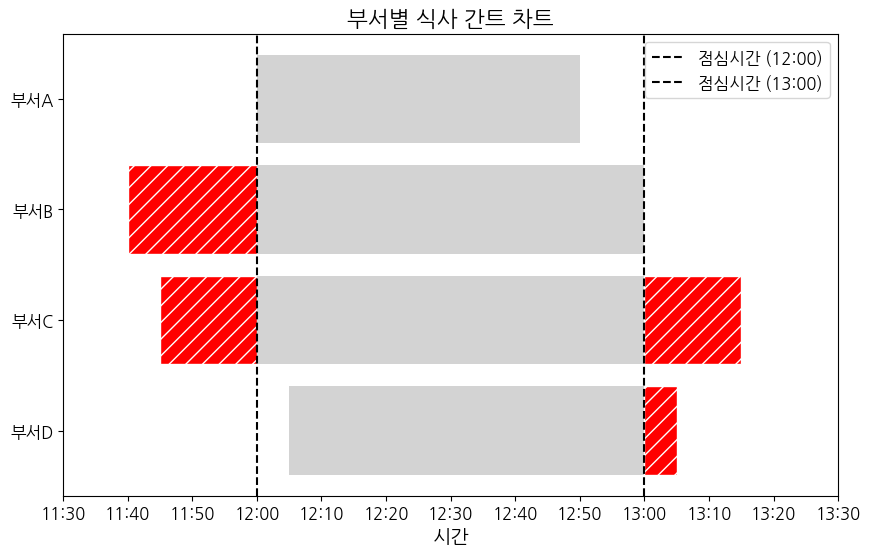

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 예시 데이터: 부서, 식사 시작 시간, 식사 종료 시간
data = {
    '부서': ['부서A', '부서B', '부서C', '부서D'],
    '식사_시작_시간': ['12:00', '11:40', '11:45', '12:05'],
    '식사_종료_시간': ['12:50', '13:00', '13:15', '13:05']
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 문자열을 datetime 형식으로 변환
df['식사_시작_시간'] = pd.to_datetime(df['식사_시작_시간'], format='%H:%M')
df['식사_종료_시간'] = pd.to_datetime(df['식사_종료_시간'], format='%H:%M')

# 간트 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 각 부서에 대한 가로 막대 그래프 생성
for i in range(len(df)):
    start_time = df['식사_시작_시간'][i]
    end_time = df['식사_종료_시간'][i]
    
    # 시작 시간이 12:00 이전인 경우
    if start_time < datetime.strptime('12:00', '%H:%M'):
        ax.barh(df['부서'][i], width=min(end_time, datetime.strptime('12:00', '%H:%M')) - start_time, left=start_time, color='red', edgecolor='w', hatch='//')
        ax.barh(df['부서'][i], width=min(end_time, datetime.strptime('13:00', '%H:%M')) - datetime.strptime('12:00', '%H:%M'), left=datetime.strptime('12:00', '%H:%M'), color='lightgrey')
        ax.barh(df['부서'][i], width=end_time - max(start_time, datetime.strptime('13:00', '%H:%M')), left=max(start_time, datetime.strptime('13:00', '%H:%M')), color='red', edgecolor='w', hatch='//')

    
    # 시작 시간이 12:00 이후이고 종료 시간이 13:00 이전인 경우
    elif start_time >= datetime.strptime('12:00', '%H:%M') and end_time <= datetime.strptime('13:00', '%H:%M'):
        ax.barh(df['부서'][i], width=end_time - start_time, left=start_time, color='lightgrey')
    
    # 종료 시간이 13:00 이후인 경우
    elif end_time > datetime.strptime('13:00', '%H:%M'):
        ax.barh(df['부서'][i], width=end_time - max(start_time, datetime.strptime('13:00', '%H:%M')), left=max(start_time, datetime.strptime('13:00', '%H:%M')), color='red', edgecolor='w', hatch='//')
        ax.barh(df['부서'][i], width=(start_time-datetime.strptime('13:00', '%H:%M')), left=datetime.strptime('13:00', '%H:%M'), color='lightgrey')
        

# X 축 레이블 및 형식 설정
ax.set_xlabel('시간', fontsize=14)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))  # 10분 간격으로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim([datetime.strptime('11:30', '%H:%M'), datetime.strptime('13:30', '%H:%M')])

# Y 축에 12:00과 13:00의 점심시간 기준선을 추가
ax.axvline(x=datetime.strptime('12:00', '%H:%M'), color='black', linestyle='--', label='점심시간 (12:00)')
ax.axvline(x=datetime.strptime('13:00', '%H:%M'), color='black', linestyle='--', label='점심시간 (13:00)')

# 그래프 스타일 및 타이틀 설정
ax.invert_yaxis()  # Y 축 순서를 역순으로 변경 (부서명이 위에서부터 아래로 표시되도록)
plt.title('부서별 식사 간트 차트', fontsize=16)
plt.legend()  # 범례 표시
plt.show()


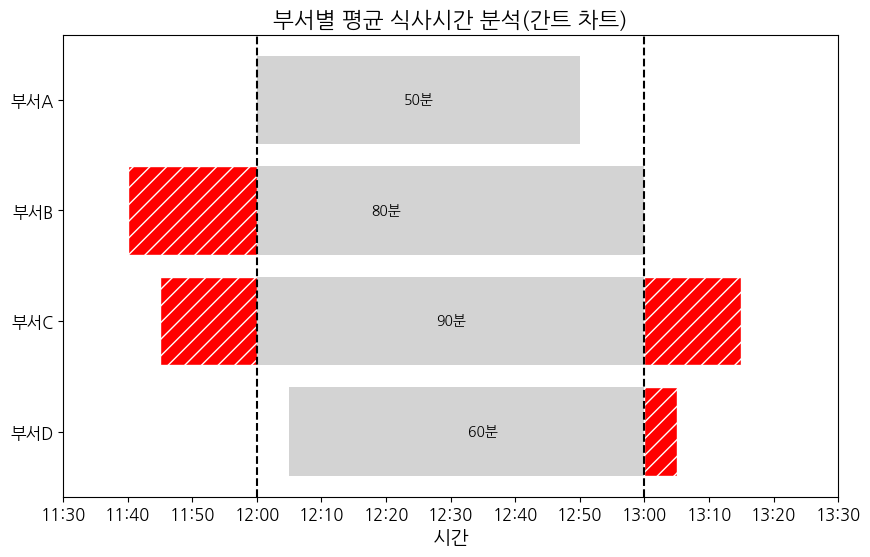

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 예시 데이터: 부서, 식사 시작 시간, 식사 종료 시간
data = {
    '부서': ['부서A', '부서B', '부서C', '부서D'],
    '식사_시작_시간': ['12:00', '11:40', '11:45', '12:05'],
    '식사_종료_시간': ['12:50', '13:00', '13:15', '13:05']
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 문자열을 datetime 형식으로 변환
df['식사_시작_시간'] = pd.to_datetime(df['식사_시작_시간'], format='%H:%M')
df['식사_종료_시간'] = pd.to_datetime(df['식사_종료_시간'], format='%H:%M')

# 간트 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 각 부서에 대한 가로 막대 그래프 생성
for i in range(len(df)):
    start_time = df['식사_시작_시간'][i]
    end_time = df['식사_종료_시간'][i]
    
    # 시작 시간이 12:00 이전인 경우
    if start_time < datetime.strptime('12:00', '%H:%M'):
        ax.barh(df['부서'][i], width=min(end_time, datetime.strptime('12:00', '%H:%M')) - start_time, left=start_time, color='red', edgecolor='w', hatch='//')
        ax.barh(df['부서'][i], width=min(end_time, datetime.strptime('13:00', '%H:%M')) - datetime.strptime('12:00', '%H:%M'), left=datetime.strptime('12:00', '%H:%M'), color='lightgrey')
        ax.barh(df['부서'][i], width=end_time - max(start_time, datetime.strptime('13:00', '%H:%M')), left=max(start_time, datetime.strptime('13:00', '%H:%M')), color='red', edgecolor='w', hatch='//')

        # 각 막대 중앙에 데이터 값 표시
        text_x = start_time + (end_time - start_time) / 2
        text_y = df['부서'][i]
        
        text_value = f'{round((end_time - start_time).total_seconds() / 60)}분'
        plt.text(text_x, text_y, text_value, ha='center', va='center', color='black', fontsize=10)

    # 시작 시간이 12:00 이후이고 종료 시간이 13:00 이전인 경우
    elif start_time >= datetime.strptime('12:00', '%H:%M') and end_time <= datetime.strptime('13:00', '%H:%M'):
        ax.barh(df['부서'][i], width=end_time - start_time, left=start_time, color='lightgrey')

        # 각 막대 중앙에 데이터 값 표시
        text_x = start_time + (end_time - start_time) / 2
        text_y = df['부서'][i]
        
        text_value = f'{round((end_time - start_time).total_seconds() / 60)}분'
        plt.text(text_x, text_y, text_value, ha='center', va='center', color='black', fontsize=10)

    # 종료 시간이 13:00 이후인 경우
    elif end_time > datetime.strptime('13:00', '%H:%M'):
        ax.barh(df['부서'][i], width=end_time - max(start_time, datetime.strptime('13:00', '%H:%M')), left=max(start_time, datetime.strptime('13:00', '%H:%M')), color='red', edgecolor='w', hatch='//')
        ax.barh(df['부서'][i], width=(start_time-datetime.strptime('13:00', '%H:%M')), left=datetime.strptime('13:00', '%H:%M'), color='lightgrey')

        # 각 막대 중앙에 데이터 값 표시
        text_x = start_time + (end_time - start_time) / 2
        text_y = df['부서'][i]        
        text_value = f'{round((end_time - start_time).total_seconds() / 60)}분'
        plt.text(text_x, text_y, text_value, ha='center', va='center', color='black', fontsize=10)

# X 축 레이블 및 형식 설정
ax.set_xlabel('시간', fontsize=14)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))  # 10분 간격으로 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim([datetime.strptime('11:30', '%H:%M'), datetime.strptime('13:30', '%H:%M')])

# Y 축에 12:00과 13:00의 점심시간 기준선을 추가
ax.axvline(x=datetime.strptime('12:00', '%H:%M'), color='black', linestyle='--')#, label='점심시간 (12:00)')
ax.axvline(x=datetime.strptime('13:00', '%H:%M'), color='black', linestyle='--')#, label='점심시간 (13:00)')

# 그래프 스타일 및 타이틀 설정
ax.invert_yaxis()  # Y 축 순서를 역순으로 변경 (부서명이 위에서부터 아래로 표시되도록)
plt.title('부서별 평균 식사시간 분석(간트 차트)', fontsize=16)
# plt.legend()  # 범례 표시
plt.show()
